In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import Tensor, LongTensor, FloatTensor
from torch.autograd import Variable

import pandas as pd
import numpy as np
import pickle

from functools import reduce

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm, tqdm_notebook

In [4]:
df = pd.read_pickle("data/full_data.pkl")
df

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement,previous_agreement,previous_user
13216722,1490918688000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,505,510,1,511015,0.000,0.000000,None
15577615,1490918728000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,490,504,1,504994,0.000,0.000000,None
5985698,1490918781000,2puPLvQ6X2zTSpfBkHXhxlIVo40=,518,498,0,499016,0.000,0.000000,None
16342824,1490919337000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,495,11,495969,0.000,0.000000,None
5693574,1490919349000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,477,495,11,495972,0.000,0.000000,None
9251462,1490919361000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,472,496,11,496968,0.000,0.000000,None
2145079,1490919379000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,473,497,11,497970,1.000,0.000000,None
966759,1490919398000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,474,498,11,498972,1.000,1.000000,None
4497938,1490919410000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,475,498,11,498973,1.000,1.000000,None
13970911,1490919426000,GP2B74SRyrZ3HIflSFoAzM+jS3U=,476,498,11,498974,1.000,1.000000,None


In [7]:
df_end = df.tail(int(2e6)).copy()

In [8]:
active_set = df_end[df_end.groupby('user').user.transform('size') > 4].copy()

In [10]:
user_set = list(active_set.user.unique())
nb_users = len(user_set)

user_to_id = dict(zip(user_set, np.arange(nb_users)))

active_set['user_id'] = active_set['user'].map(user_to_id).astype(int)

In [11]:
granularity = 50
bins = np.arange(-1,1001,granularity)
bins[-1] = 1000
active_set["x_category"] = pd.cut(active_set.x_coordinate, bins=bins, labels=False)
active_set["y_category"] = pd.cut(active_set.y_coordinate, bins=bins, labels=False)

In [16]:
active_set

,ts,user,x_coordinate,y_coordinate,color,pixel,local_agreement,previous_agreement,previous_user,user_id,x_category,y_category
10968993,1491213674000,nZcu/qt9AoVnsBeKXNqpI4SbRIo=,535,742,3,743277,0.500,0.000000,wm4CN6/PqKtwU1b6JO4U7+yqBQY=,0,10,14
2410716,1491213674000,UEnYIGc9Zmi3wUIOHaeBAPV4vwc=,988,620,0,621608,1.000,0.111111,ggFy0/43D4NFs76Q0EnNg4Xq5SM=,1,19,12
3292018,1491213674000,utZQn6HD5wb5DRWtIn85Cm6gITU=,683,633,10,634316,0.500,0.111111,SbqvdoUFrhFEgG6y70sIPjAM8VI=,2,13,12
16539985,1491213674000,rgYfE7qYrA/FYyWR0+2TuQmbFhY=,0,857,15,857857,0.800,0.000000,EkRvKVqrPIGEcwMqGu4rfniHkyU=,3,0,17
12997776,1491213674000,I0m4YrJLOoAu4nW9WPHkLPHNjJo=,359,336,15,336695,0.000,0.888889,0WxTQ2Nw8lYe4ERPrnmSiKfUBOw=,4,7,6
10122339,1491213674000,PQw24hqou9kNdA0bdF9MJB6bGVU=,592,509,5,510101,0.250,0.000000,rK6QG20vPCJ5qQBONMHGvlwa8e0=,5,11,10
8520116,1491213674000,1qvtLsNnRZoVUYF3sJi9mbnHyP0=,840,199,3,200039,0.625,0.111111,0wEK2BhtErzdwAFX7JlcffI5AXY=,6,16,3
14384431,1491213674000,Uk88jP2Pxeq0Ec6i95VXOHQ8YIs=,611,366,1,366977,0.250,0.000000,1YILCjh+IJ8N283FwICNwehfMiM=,7,12,7
4951897,1491213674000,fuqlT6LB9T2FGcXL6QIeuIW+qPc=,350,290,2,290640,0.375,0.111111,F8CpdTO6roLJ4pzRCELJeG3UEhM=,8,7,5
6923742,1491213674000,PVhBgsEqZt/Sb4a92JtnO7yzC6Y=,871,59,13,59930,0.625,0.000000,Oai1b3+vpDmSLAJzv3gqKzFheew=,9,17,1


In [17]:
cumcount = active_set.groupby('user').cumcount(ascending=False)
train_set = active_set[cumcount > 1]
validation_set = active_set[cumcount == 1]
test_set = active_set[cumcount == 0]

In [18]:
train_input = Variable(torch.LongTensor(train_set[['user_id','x_category','y_category']].values))
validation_input = Variable(torch.LongTensor(validation_set[['user_id','x_category','y_category']].values))
test_input = Variable(torch.LongTensor(test_set[['user_id','x_category','y_category']].values))

In [19]:
train_target = Variable(torch.FloatTensor(train_set.local_agreement.values))
validation_target = Variable(torch.FloatTensor(validation_set.local_agreement.values))
test_target = Variable(torch.FloatTensor(test_set.local_agreement.values))

In [23]:
def train_model(model, nb_epochs = 50, learning_rate = 0.8, mini_batch_size = 64, opt = optim.SGD):
    criterion = nn.MSELoss()
    optimizer = opt(model.parameters(), lr = learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    
    best_error = validation_input.size(0)+1
    res = []
    
    for e in tqdm_notebook(range(nb_epochs)):
        sum_loss = 0
        
        for b in tqdm_notebook(range(0, train_input.size(0), mini_batch_size)):
            if (b+mini_batch_size) > train_input.size(0):
                output = model(train_input[b:])
                loss = criterion(output, train_target[b:])
            else:
                output = model(train_input.narrow(0, b, mini_batch_size))
                loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            
            sum_loss = sum_loss + loss.data[0]
            model.zero_grad()
            loss.backward()
            optimizer.step()
            
        train_error = np.sqrt((model(train_input).squeeze() - train_target).data.pow(2).mean())
        validation_error = np.sqrt((model(validation_input).squeeze() - validation_target).data.pow(2).mean())
        scheduler.step(validation_error)
        
        print("  Epoch {:>3} : loss = {:1.8f} | training error = {:>4} | validation error = {:>4}".format(e+1, sum_loss, train_error, validation_error))
        res.append(validation_error)
        
        if (validation_error < best_error) or ( (validation_error == best_error) and ((e+1) < best_epoch) ):
            best_error = validation_error
            best_epoch = e+1
            
    return [ res, best_error, best_epoch ]

In [15]:
class Zone_Embedding(nn.Module):
    def __init__(self, n_users, n_zones, K=10):
        super(Zone_Embedding, self).__init__()
        self.user_embs = nn.Embedding(n_users,K)
        self.user_embs.weight.data.normal_(0.5,0.5)
        #self.user_bias = nn.Embedding(n_users,1)
        #self.user_bias.weight.data.normal_(0.5,0.5)
        self.zone_embs = nn.Embedding(n_zones,K)
        self.sig = nn.Sigmoid()
        self.width = np.sqrt(n_zones)

    def forward(self, args):
        users = self.user_embs(args[:,0])
        zones = self.zone_embs(args[:,1]*self.width+args[:,2])
        res = (users*zones).sum(1)
        #res += self.user_bias(args[:,0]).squeeze()
        return self.sig(res)

In [25]:
zone_model = Zone_Embedding(nb_users, (len(bins)-1)**2)

In [45]:
zone_res = train_model(zone_model)

  Epoch   1 : loss = 1635.93986570 | training error = 0.28326499773605424 | validation error = 0.3200016518485672


  Epoch   2 : loss = 1627.21136460 | training error = 0.28257223721706537 | validation error = 0.3197367929397193


  Epoch   3 : loss = 1618.61760986 | training error = 0.28188739581205535 | validation error = 0.31947734987061416


  Epoch   4 : loss = 1610.15750656 | training error = 0.2812105256317611 | validation error = 0.3192234517810814


  Epoch   5 : loss = 1601.82990314 | training error = 0.2805416622526094 | validation error = 0.3189752066037959


  Epoch   6 : loss = 1593.63346099 | training error = 0.2798808227308516 | validation error = 0.31873269541349397


  Epoch   7 : loss = 1585.56660437 | training error = 0.2792280147913337 | validation error = 0.31849599939784007


  Epoch   8 : loss = 1577.62748098 | training error = 0.27858322199978397 | validation error = 0.3182652003062537


  Epoch   9 : loss = 1569.81404294 | training error = 0.27794642446930184 | validation error = 0.318040376021706


  Epoch  10 : loss = 1562.12418583 | training error = 0.27731759935952394 | validation error = 0.3178216061524777


  Epoch  11 : loss = 1554.55578006 | training error = 0.2766967222059403 | validation error = 0.31760896118702814


  Epoch  12 : loss = 1547.10685679 | training error = 0.27608376657155187 | validation error = 0.3174024871922463


  Epoch  13 : loss = 1539.77556214 | training error = 0.2754787130091744 | validation error = 0.3172022164153089


  Epoch  14 : loss = 1532.56009930 | training error = 0.27488151754452916 | validation error = 0.31700814928552107


  Epoch  15 : loss = 1525.45859853 | training error = 0.27429212486458604 | validation error = 0.31682026055788376


  Epoch  16 : loss = 1518.46893818 | training error = 0.27371043390539557 | validation error = 0.31663852341472215


  Epoch  17 : loss = 1511.58870012 | training error = 0.27313635031195677 | validation error = 0.31646290322281406


  Epoch  18 : loss = 1504.81583807 | training error = 0.27256988537852733 | validation error = 0.3162933463988593


  Epoch  19 : loss = 1498.14977955 | training error = 0.2720111692448449 | validation error = 0.316129779917633


  Epoch  20 : loss = 1491.59061931 | training error = 0.2714602310903373 | validation error = 0.3159721205469022


  Epoch  21 : loss = 1485.13679078 | training error = 0.2709169189717602 | validation error = 0.31582029597740596


  Epoch  22 : loss = 1478.78533237 | training error = 0.27038103464621677 | validation error = 0.3156742267937855


  Epoch  23 : loss = 1472.53337630 | training error = 0.26985242655626657 | validation error = 0.315533828502676


  Epoch  24 : loss = 1466.37851534 | training error = 0.2693309658100272 | validation error = 0.31539900523314124


  Epoch  25 : loss = 1460.31863051 | training error = 0.2688165387036914 | validation error = 0.3152696523990544


  Epoch  26 : loss = 1454.35176063 | training error = 0.26830903916136856 | validation error = 0.3151456527532564


  Epoch  27 : loss = 1448.47599388 | training error = 0.26780835170451844 | validation error = 0.31502689058664207


  Epoch  28 : loss = 1442.68943120 | training error = 0.2673143669711282 | validation error = 0.3149132533201975


  Epoch  29 : loss = 1436.99021250 | training error = 0.26682696608692297 | validation error = 0.31480462166401096


  Epoch  30 : loss = 1431.37640127 | training error = 0.26634601969544464 | validation error = 0.314700879870432


  Epoch  31 : loss = 1425.84605754 | training error = 0.2658713975782224 | validation error = 0.31460192823436545


  Epoch  32 : loss = 1420.39716661 | training error = 0.26540295498907374 | validation error = 0.3145076442099885


  Epoch  33 : loss = 1415.02774339 | training error = 0.2649405558498342 | validation error = 0.3144179093119028


  Epoch  34 : loss = 1409.73593469 | training error = 0.26448410056712235 | validation error = 0.3143326065342687


  Epoch  35 : loss = 1404.52010315 | training error = 0.26403349715319235 | validation error = 0.31425158478821585


  Epoch  36 : loss = 1399.37875144 | training error = 0.26358865861606606 | validation error = 0.3141746953497723


  Epoch  37 : loss = 1394.31048940 | training error = 0.26314949962761186 | validation error = 0.31410178880429795


  Epoch  38 : loss = 1389.31381790 | training error = 0.262715899914449 | validation error = 0.31403274253382774


  Epoch  39 : loss = 1384.38704029 | training error = 0.26228771614675855 | validation error = 0.31396744930065473


  Epoch  40 : loss = 1379.52837100 | training error = 0.26186483387973636 | validation error = 0.3139058429282317


  Epoch  41 : loss = 1374.73627296 | training error = 0.2614471907384007 | validation error = 0.313847872981606


  Epoch  42 : loss = 1370.00972138 | training error = 0.2610347673954321 | validation error = 0.3137935300698072


  Epoch  43 : loss = 1365.34816798 | training error = 0.2606275470143893 | validation error = 0.3137428249916758


  Epoch  44 : loss = 1360.75108675 | training error = 0.26022547238424804 | validation error = 0.31369576936071253


  Epoch  45 : loss = 1356.21752143 | training error = 0.25982845602838195 | validation error = 0.3136523548368337


  Epoch  46 : loss = 1351.74628576 | training error = 0.25943639939376334 | validation error = 0.31361255432059176


  Epoch  47 : loss = 1347.33617685 | training error = 0.2590492254456309 | validation error = 0.31357638415736633


  Epoch  48 : loss = 1342.98605471 | training error = 0.25866687212888423 | validation error = 0.3135438975712564


  Epoch  49 : loss = 1338.69488283 | training error = 0.25828925264403074 | validation error = 0.313515120355012


  Epoch  50 : loss = 1334.46168149 | training error = 0.25791631809581855 | validation error = 0.31349001695658707



In [46]:
#rmse
np.sqrt((zone_model(test_input).squeeze() - test_target).data.pow(2).mean())

0.32442440374849485

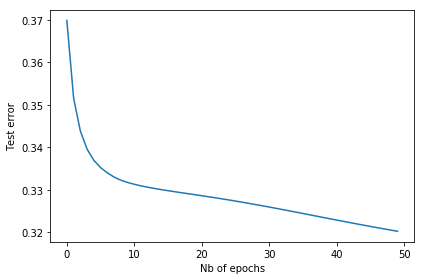

In [29]:
plt.figure()
plt.plot(range(len(zone_res[0])),zone_res[0])
plt.xlabel("Nb of epochs")
plt.ylabel("Test error")
plt.tight_layout()
plt.savefig("figures/zone_model_results.pdf")
plt.show()

In [30]:
with open("results/zone_model.pkl", "wb") as f:
    pickle.dump(zone_res, f)

In [31]:
with open("models/zone_model.m", "wb") as f:
    torch.save(zone_model, f)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/serialization.py:159: UserWarning: Couldn't retrieve source code for container of type Zone_Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## Looking at patches

In [46]:
def show_canvas(data, savefile=None):
    last_frame = data.groupby('pixel').last()
    x_min = last_frame.x_coordinate.min()
    x_max = last_frame.x_coordinate.max()
    y_min = last_frame.y_coordinate.min()
    y_max = last_frame.y_coordinate.max()

    OFFSET = 1001
    IMAGE_WIDTH = x_max - x_min + 1
    IMAGE_HEIGHT = y_max - y_min + 1
    COLORMAP = np.array(["#FFFFFF","#E4E4E4","#888888","#222222","#FFA7D1","#E50000","#E59500","#A06A42","#E5D900","#94E044","#02BE01","#00E5F0","#0083C7","#0000EA","#E04AFF","#820080"])

    squared_range = np.concatenate([ np.arange(x_min + i*OFFSET, x_max + i*OFFSET + 1) for i in np.arange(y_min, y_max + 1) ])

    image = last_frame.reindex(squared_range, fill_value=0).color.values.reshape((IMAGE_HEIGHT,IMAGE_WIDTH))

    plt.figure(figsize=(20,20))
    plt.imshow(image, cmap=ListedColormap(COLORMAP[image.min():image.max()+1]))
    if savefile is not None:
        plt.tight_layout()
        plt.savefig(savefile)
    plt.show()
    
    return image

In [12]:
center = active_set[(active_set.x_category == 10) & (active_set.y_category == 10)]

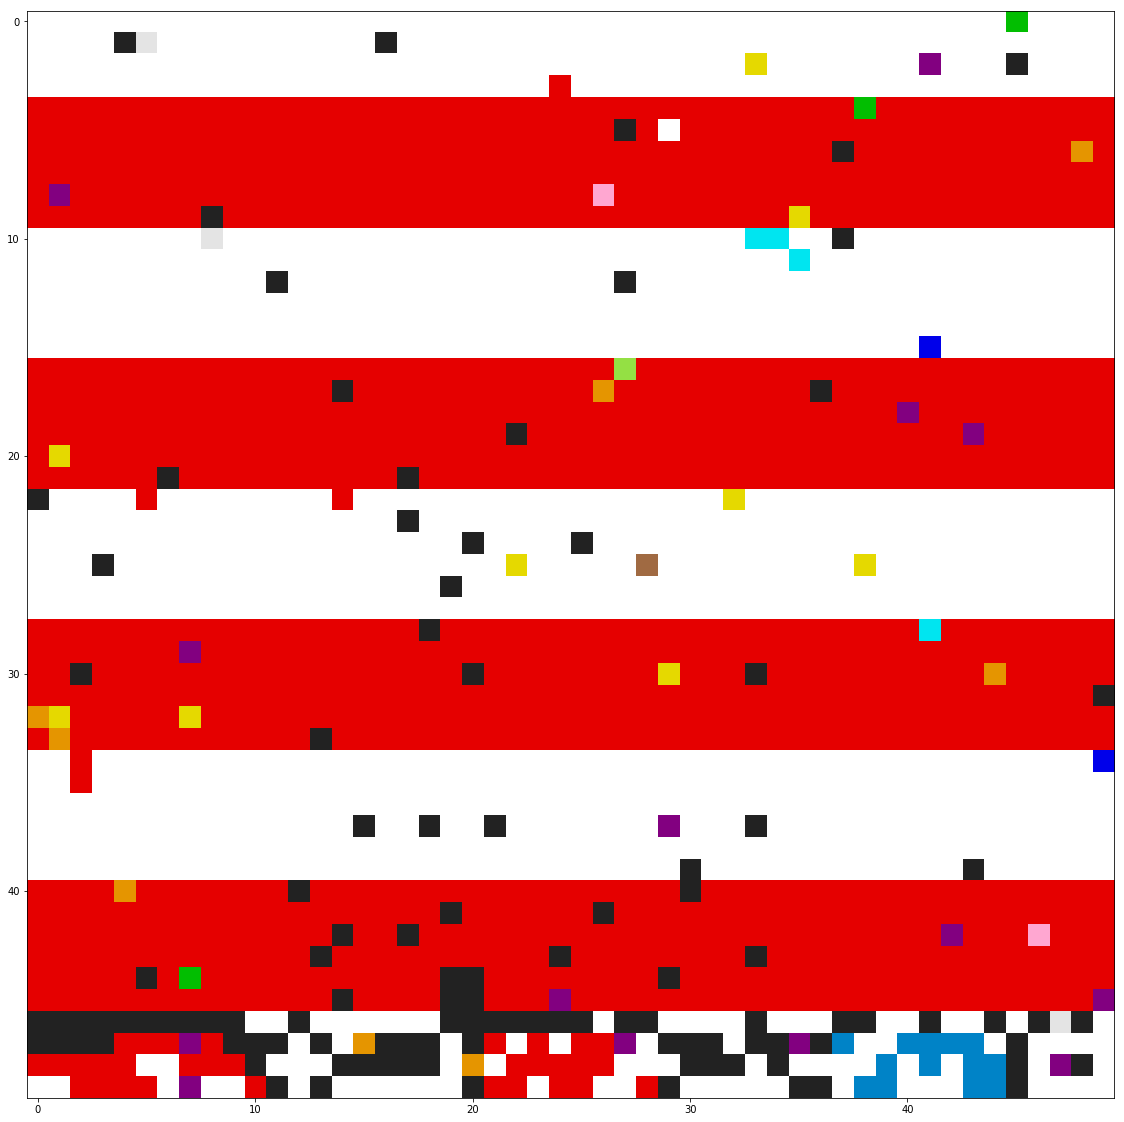

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 3,  3,  3, ...,  0,  0,  0],
       [ 5,  5,  5, ..., 15,  3,  0],
       [ 0,  0,  5, ...,  0,  0,  0]])

In [13]:
show_canvas(center)

In [136]:
zoneXuser = []
for i in tqdm_notebook(range((len(bins)-1)**2)):
    acc = []
    for j in range(nb_users):
        acc.append((zone_model.user_embs.weight[j].dot(zone_model.zone_embs.weight[i]) + zone_model.user_bias.weight[j]).data[0])
    zoneXuser.append(acc)
zoneXuser = np.array(zoneXuser)

In [16]:
with open("models/zone_model.m", "rb") as f:
    zone_model = torch.load(f)

In [17]:
i = 9*(len(bins)-1)+10
j = 10*(len(bins)-1)+10
usa_flag = []
for k in range(nb_users):
    usa_flag.append((zone_model.user_embs.weight[k].dot(zone_model.zone_embs.weight[i])
                     +zone_model.user_embs.weight[k].dot(zone_model.zone_embs.weight[j])).data[0])
usa_flag = np.array(usa_flag)

In [18]:
top_10000_users_id = np.argsort(usa_flag)[::-1][:10000]

In [35]:
top_5000_users_id = np.argsort(usa_flag)[::-1][:5000]

In [19]:
df_top_10000 = active_set[active_set.user_id.isin(top_10000_users_id)]

In [29]:
df['user_id'] = df['user'].map(user_to_id)

In [36]:
test_df_top_5000 = df[df.user_id.isin(top_5000_users_id)]

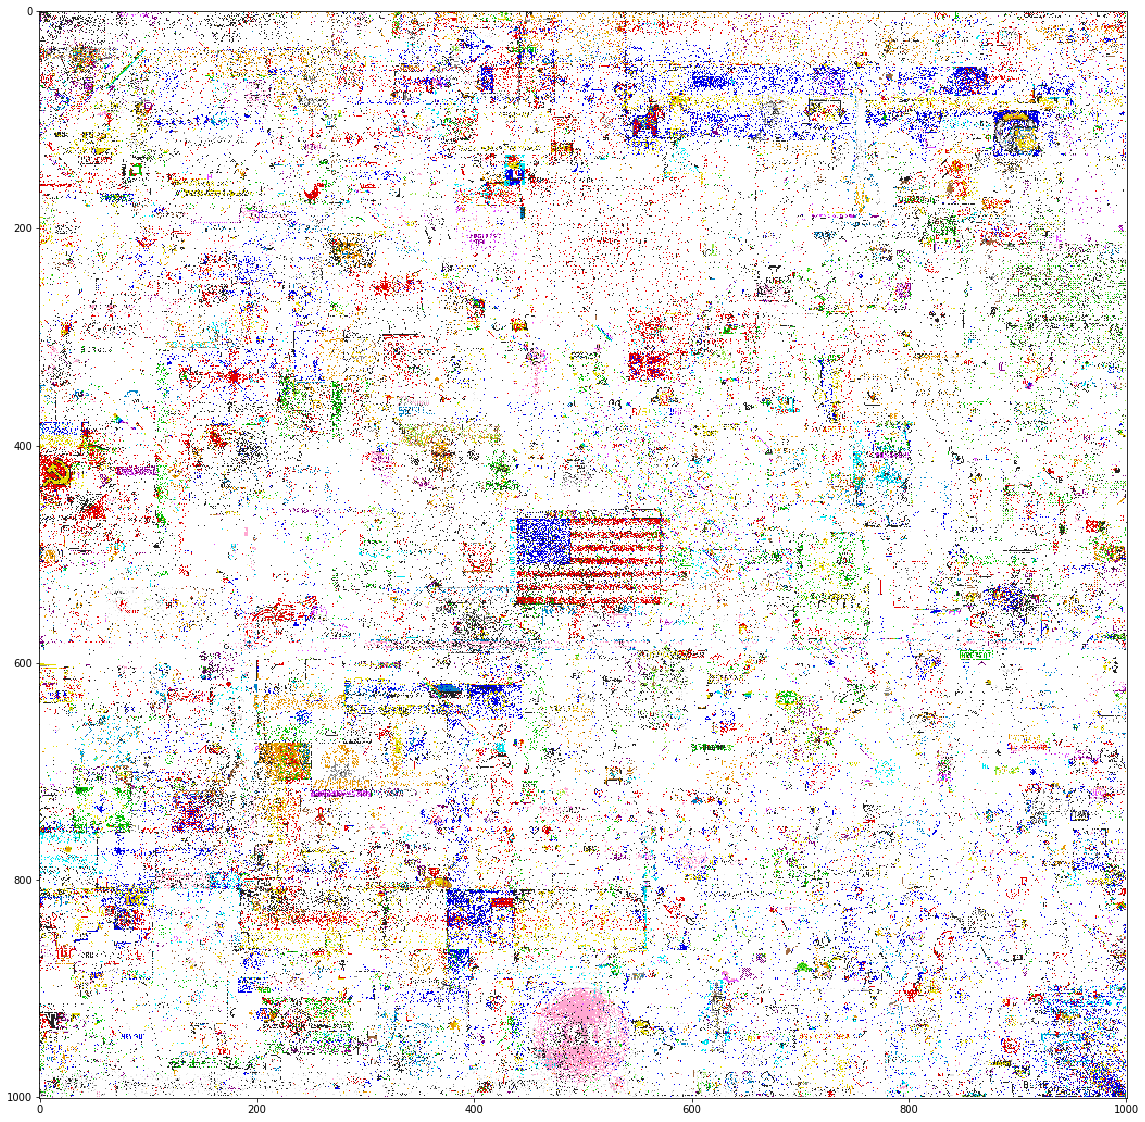

array([[ 0,  0,  3, ...,  0,  0, 12],
       [ 0,  3,  3, ...,  3,  0,  0],
       [ 0,  3,  3, ...,  3,  0,  0],
       ...,
       [ 1,  1,  3, ...,  8, 13,  0],
       [ 1,  1,  1, ..., 10, 15,  0],
       [ 0,  0,  0, ...,  0, 12,  0]])

In [37]:
#show_canvas(df_top_10000, savefile="figures/usa_flag_top_10k.pdf")
show_canvas(test_df_top_5000)

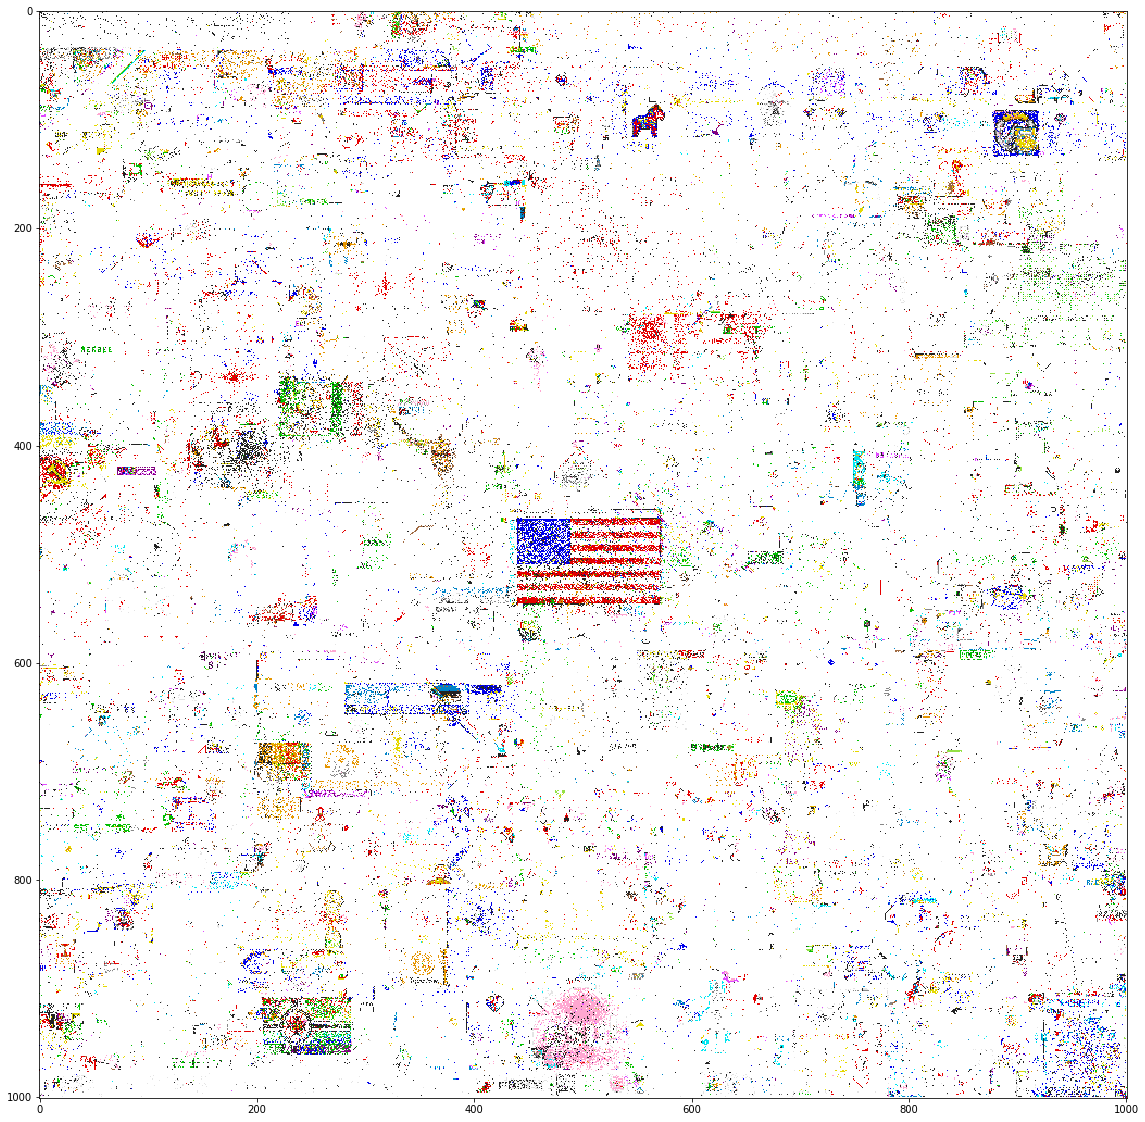

In [24]:
#show_canvas(df_top_10000, savefile="figures/usa_flag_top_10k.pdf")
imagetop10k = show_canvas(df_top_10000)

In [21]:
tail_10000_users_id = np.argsort(usa_flag)[:10000]

In [38]:
tail_5000_users_id = np.argsort(usa_flag)[:5000]

In [22]:
df_tail_10000 = active_set[active_set.user_id.isin(tail_10000_users_id)]

In [39]:
test_df_tail_5000 = df[df.user_id.isin(tail_5000_users_id)]

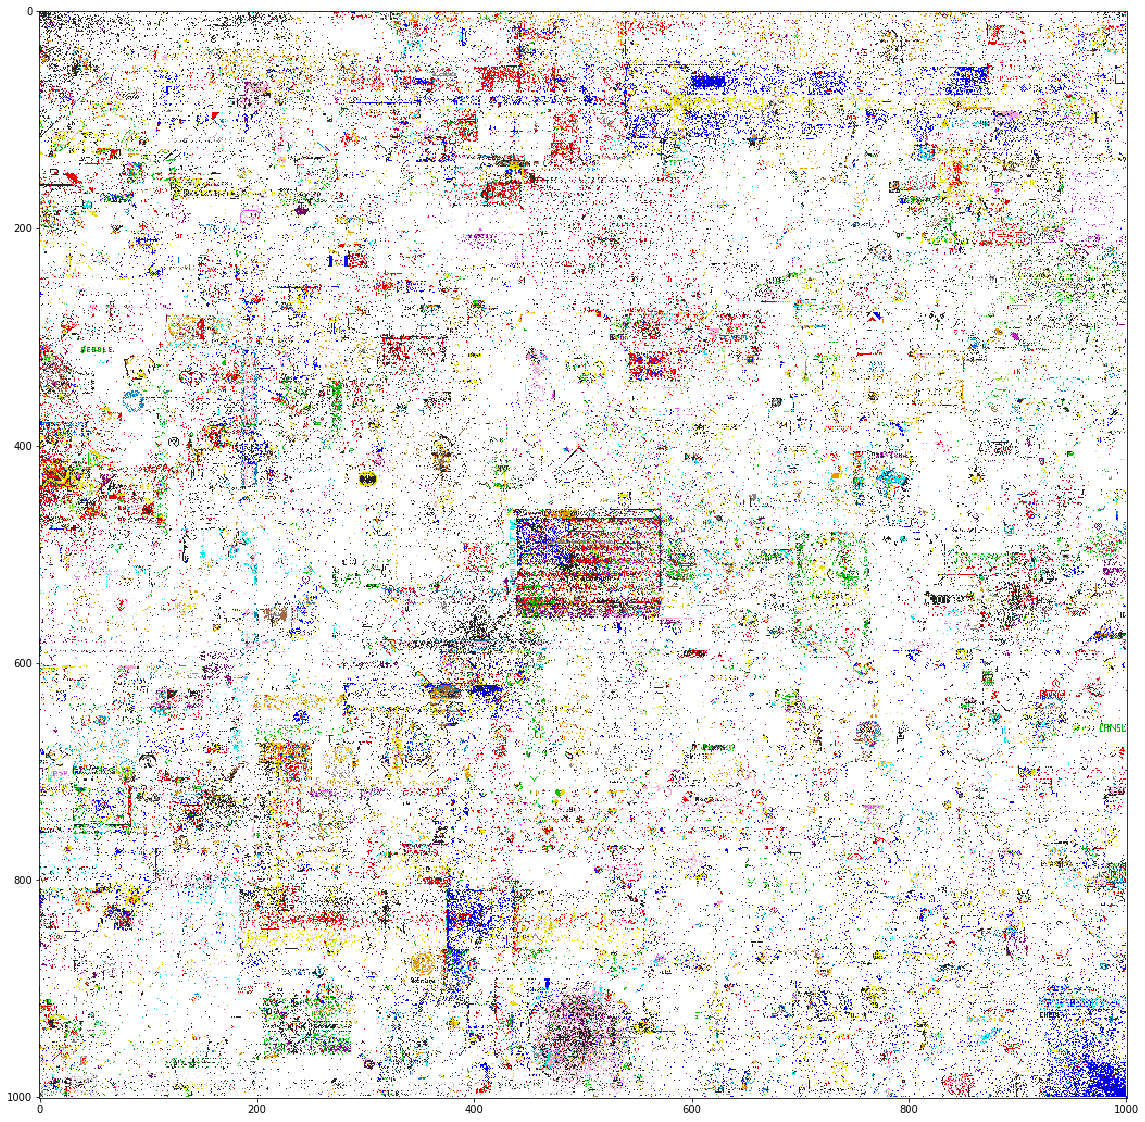

array([[ 0,  0,  3, ...,  0, 13,  0],
       [ 0, 10,  3, ...,  0,  0,  0],
       [15,  3,  0, ...,  5, 13,  0],
       ...,
       [ 1,  2,  3, ..., 13, 13,  0],
       [ 1,  2,  1, ..., 13, 13, 13],
       [ 0,  0,  0, ...,  0,  0, 13]])

In [40]:
#show_canvas(test_df_tail_5000, savefile="figures/usa_flag_tail_10k_v2.pdf")
show_canvas(test_df_tail_5000)

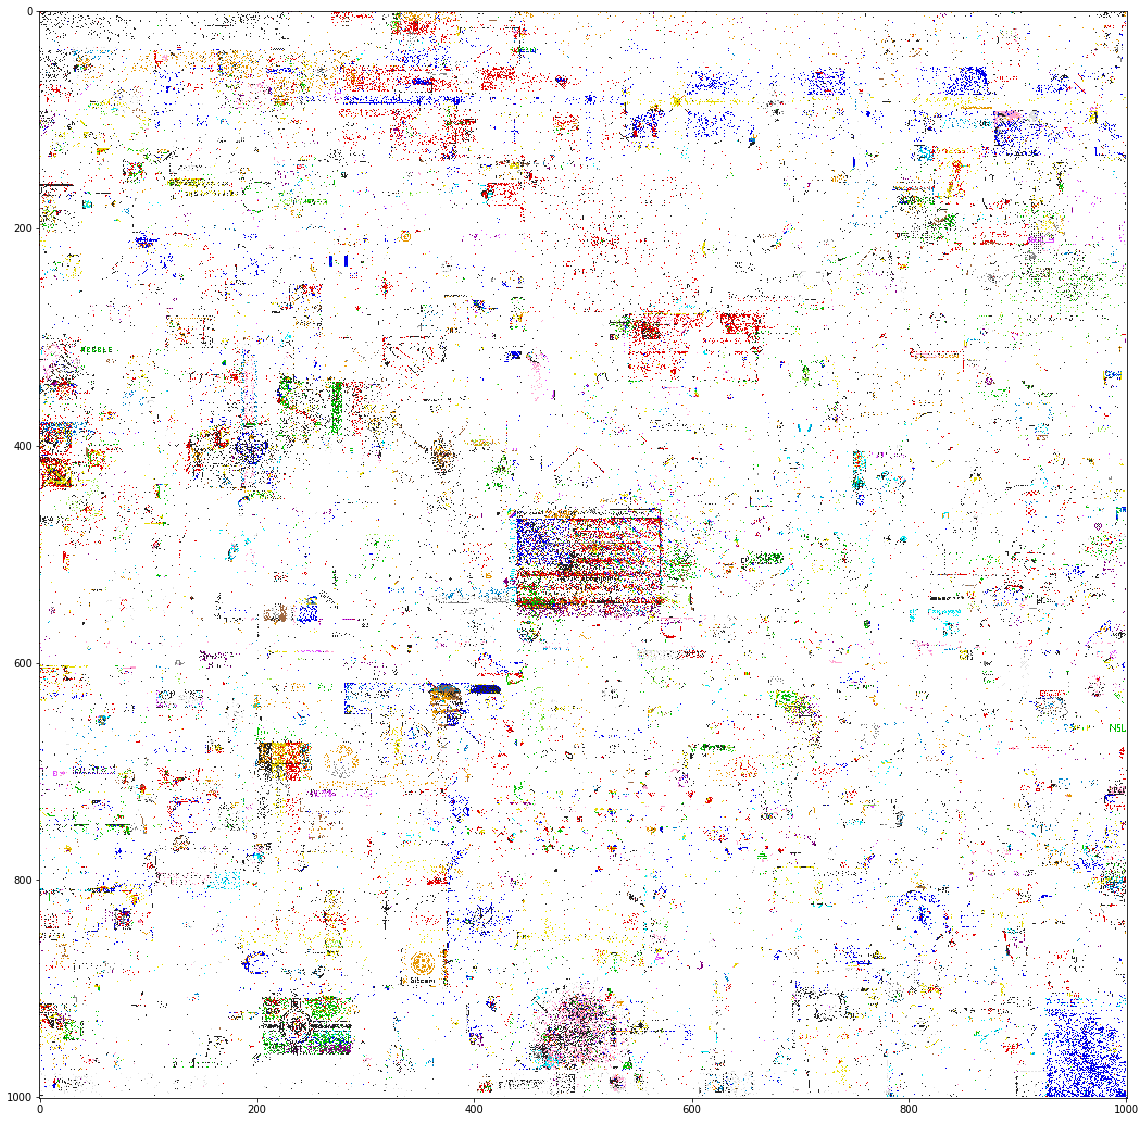

array([[ 0,  0,  0, ...,  0,  6,  0],
       [ 0,  3,  3, ...,  3,  0,  0],
       [ 0,  5,  0, ...,  6,  6,  0],
       ...,
       [ 1,  3,  3, ..., 13, 13,  9],
       [ 1,  0,  1, ..., 13, 13,  0],
       [ 0,  0,  0, ...,  0,  0, 13]])

In [27]:
show_canvas(df_tail_10000, savefile="figures/usa_flag_tail_10k_v2.pdf")

## Batch size

In [67]:
batch_sizes = range(50,400,100)

batch_results = []
for b_size in tqdm_notebook(batch_sizes):
    print("BATCH SIZE", b_size)
    print("-"*15)
    model = Zone_Embedding(nb_users, (len(bins)-1)**2)
    batch_results.append(train_model(model, nb_epochs=25, mini_batch_size=b_size))
    with open("../models/zone_model_bias_batch_size"+str(b_size)+".m", "wb") as f:
        torch.save(model, f)
    print("="*30)

BATCH SIZE 50
---------------


  Epoch   1 : loss = 5868.85576523 | training error = 0.43427441439345915 | validation error = 0.4432195334994798


  Epoch   2 : loss = 4984.10585354 | training error = 0.4100279951096905 | validation error = 0.4229167179202847


  Epoch   3 : loss = 4519.38048773 | training error = 0.39437079553839943 | validation error = 0.4094975961933168


  Epoch   4 : loss = 4219.39932375 | training error = 0.3833434832437318 | validation error = 0.3998881021597104


  Epoch   5 : loss = 4010.61461386 | training error = 0.37523351070258926 | validation error = 0.39277227208018967


  Epoch   6 : loss = 3855.75775013 | training error = 0.3688911024403027 | validation error = 0.38719029117995857


  Epoch   7 : loss = 3734.42547509 | training error = 0.363729007082841 | validation error = 0.3826582171561184


  Epoch   8 : loss = 3635.67297170 | training error = 0.35939446563659905 | validation error = 0.3788724364918629


  Epoch   9 : loss = 3552.81554535 | training error = 0.35566840461149973 | validation error = 0.37562556245018525


  Epoch  10 : loss = 3481.79353740 | training error = 0.35241156055274914 | validation error = 0.3727811498409439


  Epoch  11 : loss = 3419.91021053 | training error = 0.3495252390223739 | validation error = 0.37025543842218483


  Epoch  12 : loss = 3365.28435763 | training error = 0.346941347575118 | validation error = 0.36800530979642665


  Epoch  13 : loss = 3316.59459351 | training error = 0.34460932363812047 | validation error = 0.3659999131193616


  Epoch  14 : loss = 3272.82019535 | training error = 0.3424892199250816 | validation error = 0.3642053286171866


  Epoch  15 : loss = 3233.24907102 | training error = 0.3405589489818992 | validation error = 0.3625928874961808


  Epoch  16 : loss = 3197.47808710 | training error = 0.33880350083678507 | validation error = 0.3611428486543026


  Epoch  17 : loss = 3165.07722283 | training error = 0.3371992731493288 | validation error = 0.35983213742861697


  Epoch  18 : loss = 3135.49672902 | training error = 0.33572002554507147 | validation error = 0.35863676456749427


  Epoch  19 : loss = 3108.25136647 | training error = 0.33434578514016067 | validation error = 0.3575386062110733


  Epoch  20 : loss = 3082.98574298 | training error = 0.3330619720596842 | validation error = 0.3565242832674663


  Epoch  21 : loss = 3059.43228809 | training error = 0.3318572300737569 | validation error = 0.3555832243796604


  Epoch  22 : loss = 3037.37747048 | training error = 0.3307222471389547 | validation error = 0.3547066220703257


  Epoch  23 : loss = 3016.64405157 | training error = 0.32964915027468605 | validation error = 0.3538869448918922


  Epoch  24 : loss = 2997.08159298 | training error = 0.32863117804672604 | validation error = 0.35311765921986155


  Epoch  25 : loss = 2978.56107980 | training error = 0.3276624870518959 | validation error = 0.3523930937332082



FileNotFoundError: [Errno 2] No such file or directory: 'models/zone_model_bias_batch_size50.m'

In [102]:
with open("../results/zone_model_bias_bsize_results.pkl", "wb") as f:
    pickle.dump(batch_results,f)

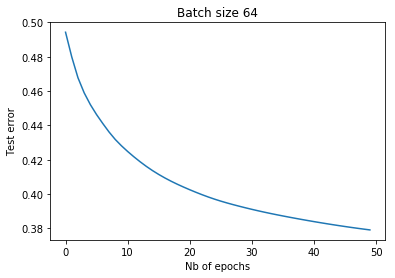

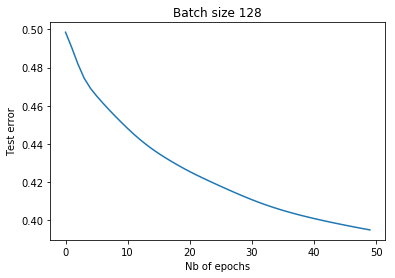

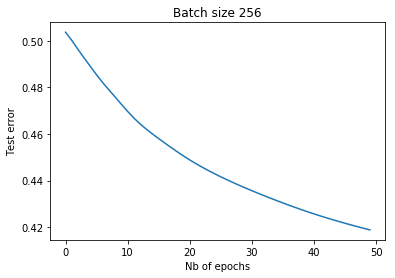

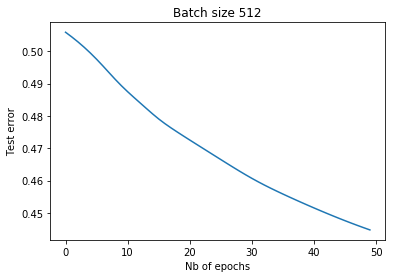

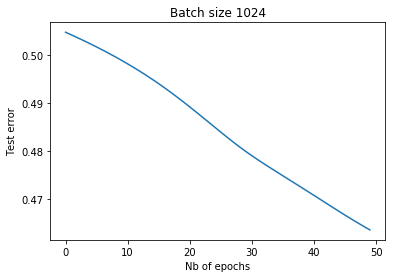

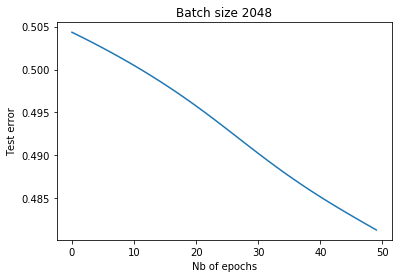

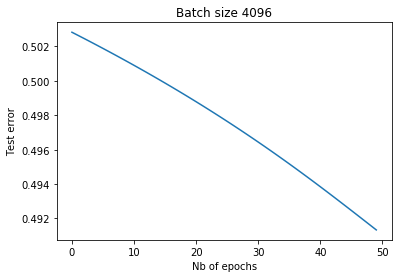

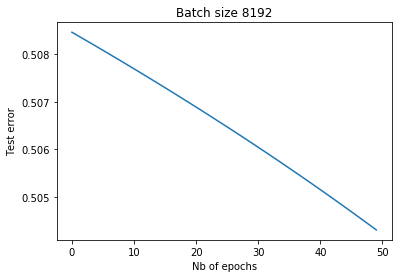

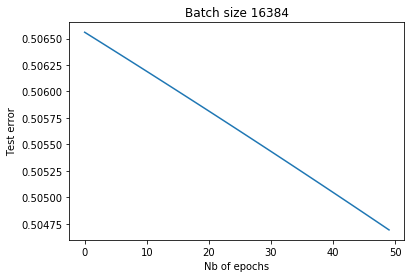

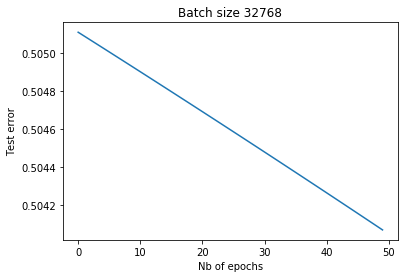

In [100]:
for res,bs in zip(batch_results,batch_sizes):
    plt.figure()
    plt.plot(range(len(res[0])),res[0])
    plt.xlabel("Nb of epochs")
    plt.ylabel("Test error")
    plt.title("Batch size "+str(bs))
plt.show()

## Learning rate

In [36]:
learning_rates = [ 0.9, 0.8, 0.7, 0.6, 0.5 ]

lr_results = []
for lr in tqdm_notebook(learning_rates):
    print("LEARNING RATE", lr)
    print("-"*15)
    model = Zone_Embedding(nb_users, (len(bins)-1)**2)
    lr_results.append(train_model(model, nb_epochs=20, mini_batch_size=256, learning_rate=lr))
    with open("../models/zone_model_bias_lr_"+str(lr)+".m", "wb") as f:
        torch.save(model, f)
    print("="*30)

LEARNING RATE 0.75
---------------


  Epoch   1 : loss = 3997.78680717 | training error = 0.3490364036970301 | validation error = 0.365479246436096


  Epoch   2 : loss = 3104.96461703 | training error = 0.33179718748736253 | validation error = 0.34819363756300103


  Epoch   3 : loss = 2893.80568783 | training error = 0.32512411710105754 | validation error = 0.3410036020801271


KeyboardInterrupt: 

In [126]:
with open("../results/zone_model_bias_lr_results.pkl", "wb") as f:
    pickle.dump(lr_results,f)

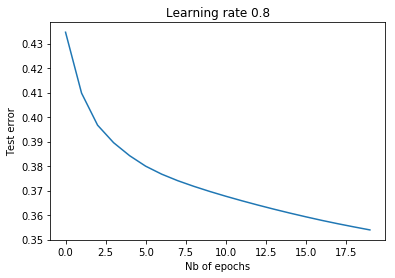

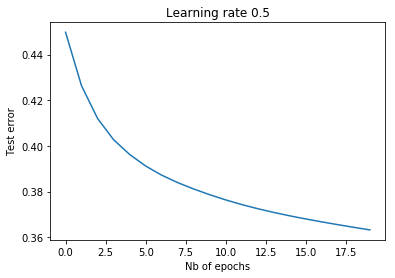

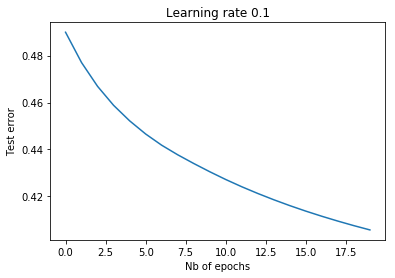

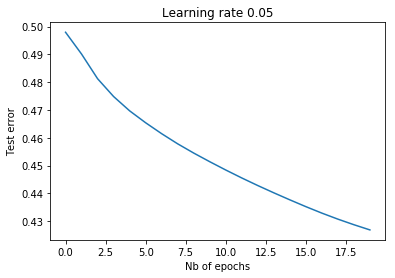

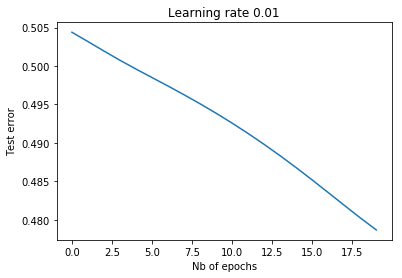

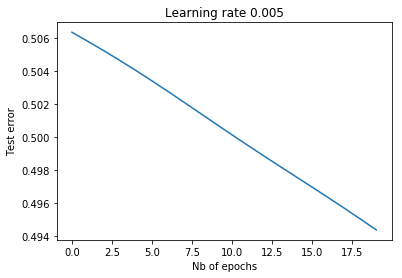

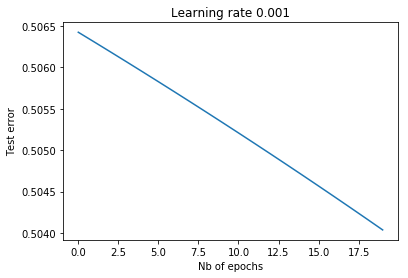

In [127]:
for res,lr in zip(lr_results, learning_rates):
    plt.figure()
    plt.plot(range(len(res[0])),res[0])
    plt.xlabel("Nb of epochs")
    plt.ylabel("Test error")
    plt.title("Learning rate "+str(lr))
plt.show()